In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('boston_housing.csv')

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
df.describe


<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  

In [10]:
Y = df['MEDV']
X = df.drop('MEDV', axis = 1)


In [11]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [12]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [16]:
X_train,X_test , Y_train, Y_test = train_test_split(X,Y)

In [17]:
X_train.shape

(379, 13)

In [18]:
Y_train.shape

(379,)

In [21]:
ss = StandardScaler()
X_norm = ss.fit_transform(X_train)

In [22]:
sgdr = SGDRegressor()
sgdr.fit(X_norm, Y_train)

SGDRegressor()

In [23]:
Y_pred = sgdr.predict(X_norm)

In [24]:
compare_data = {'training value': Y_train, 'Target value': Y_pred}
cd = pd.DataFrame(compare_data)
cd

,training value,Target value
121,20.3,21.099372
255,20.9,22.493646
22,15.2,15.884685
246,24.3,20.366816
164,22.7,23.688043
...,...,...
482,25.0,27.739402
306,33.4,34.012183
260,33.8,33.945280
168,23.8,25.564980


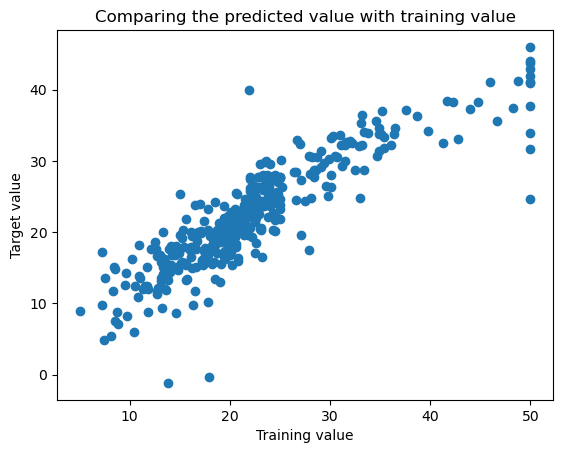

In [27]:
plt.scatter(cd['training value'], cd['Target value'])
plt.xlabel('Training value')
plt.ylabel('Target value')
plt.title('Comparing the predicted value with training value')
plt.show()

C:\Users\shwet\AppData\Local\Temp\ipykernel_9384\1754040949.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(np.array(Y_pred), bw=0.50)


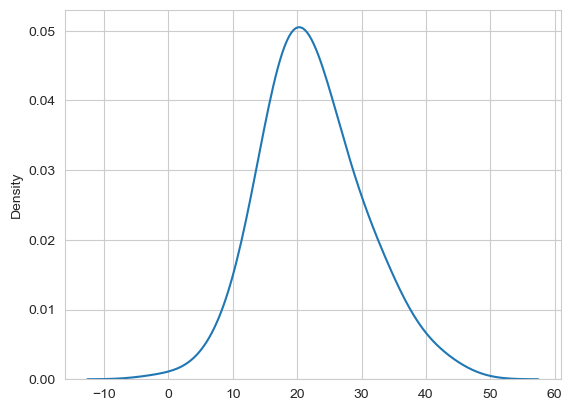

In [28]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.50)
plt.show()

In [31]:
X_norm = ss.fit_transform(X_test)
Y_pred2 = sgdr.predict(X_norm)


In [32]:
comp_data_2 = {'Test value': Y_test, 'Pred value': Y_pred2}
cd2 = pd.DataFrame(comp_data_2)
cd2

,Test value,Pred value
117,19.2,23.572216
36,20.0,21.869175
294,21.7,24.627264
265,22.8,26.716692
448,14.1,18.512508
...,...,...
433,14.3,17.291484
62,22.2,23.425285
67,22.0,21.882500
280,45.4,36.576717


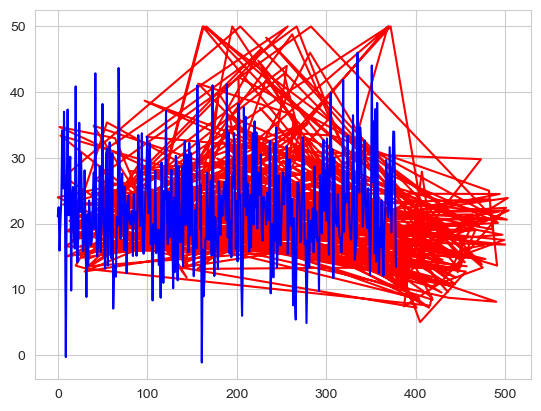

In [33]:
plt.plot(Y_train, c='r')
plt.plot(Y_pred, c='b')
plt.show()

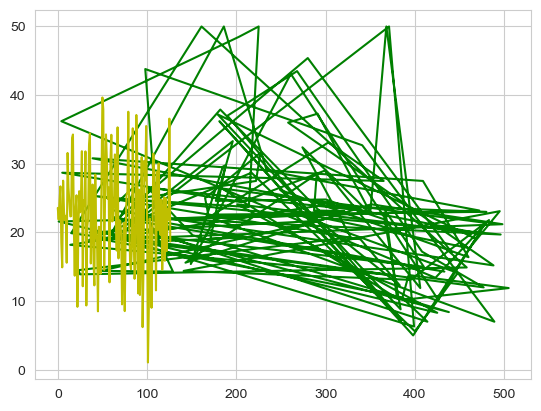

In [35]:
plt.plot(Y_test, c='g')
plt.plot(Y_pred2, c='y')
plt.show()

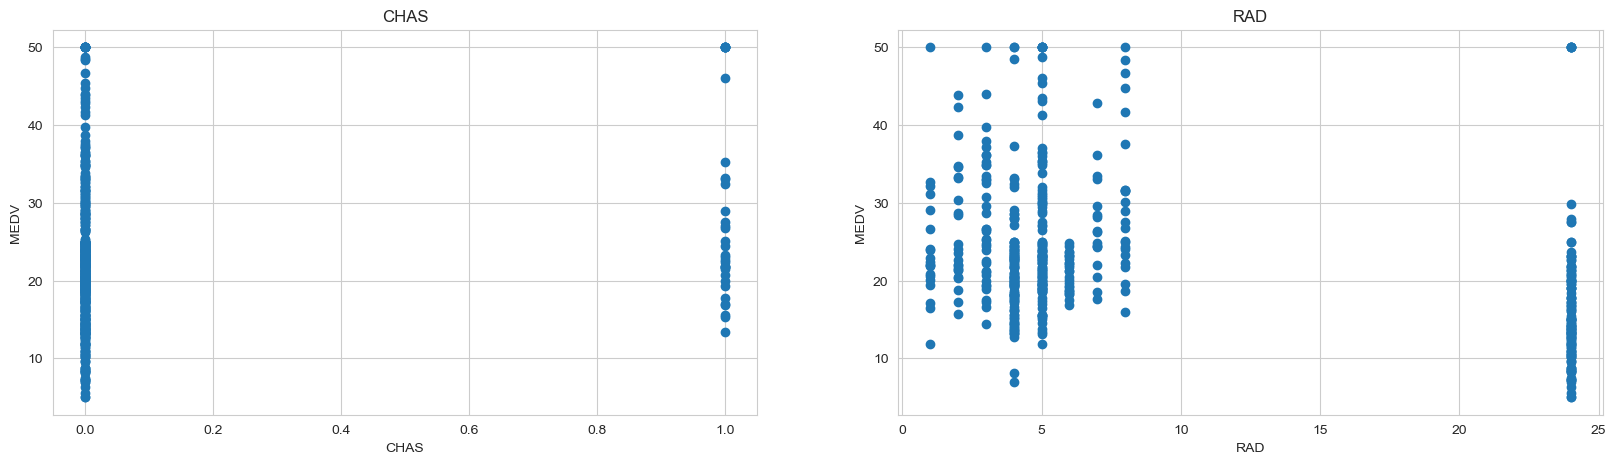

In [38]:
plt.figure(figsize=(20, 5))

features = ['CHAS', 'RAD']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')